# Videos Games Sales Analysis and Visualization
[링크](https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization)

In [64]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # 데이터프레임에 모든 열 이름 표시

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid") # style 고정

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
import os

for dirname, _, filenames in os.walk("./data/video_game_sales"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/video_game_sales\vgsales.csv


In [2]:
data = pd.read_csv("./data/video_game_sales/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


2016년부터는 연도 전체에 대한 정보가 없다. 따라서 보다 정확한 분석을 위해 제거해준다.

In [3]:
drop_row_index = data[data["Year"] > 2015].index
data = data.drop(drop_row_index)

In [4]:
data.shape

(16250, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


- `Rank` - Ranking of overall sales, integer
- `Name` - The games name
- `Platform` - Platform of the games release (i.e. PC,PS4, etc.), object
- `Year` - Year of the game's release, float
- `Genre` - Genre of the game ,object
- `Publisher` - Publisher of the game, object
- `NA_Sales` - Sales in North America (in millions), float
- `EU_Sales` - Sales in Europe (in millions), float
- `JP_Sales` - Sales in Japan (in millions), float
- `Other_Sales` - Sales in the rest of the world (in millions), float
- `Global_Sales` - Total worldwide sales, float

In [6]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
data.describe(include=["object", "bool"])

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [8]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## 1. What genre games have been made the most?

In [9]:
data["Genre"].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

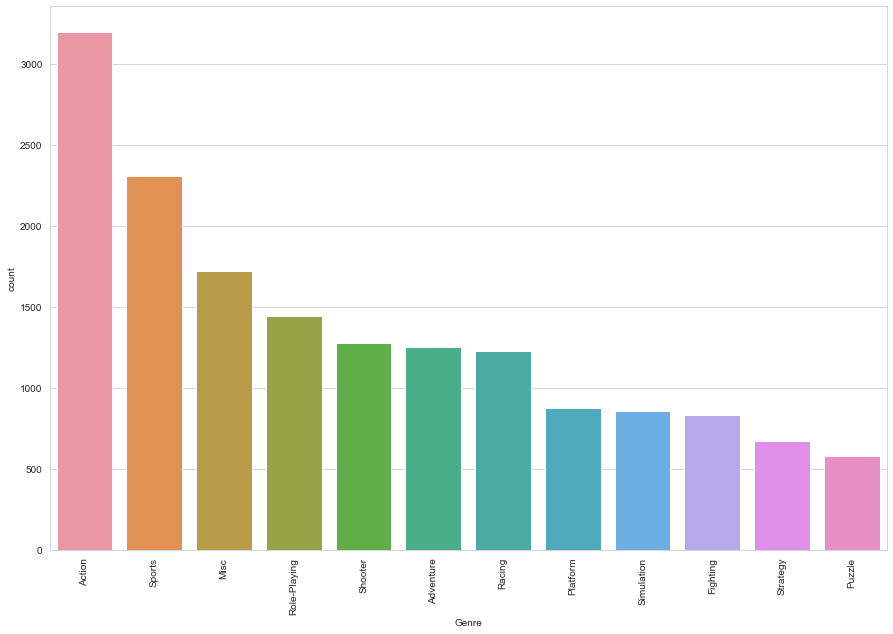

In [10]:
plt.figure(figsize=(15 ,10))
sns.countplot(x="Genre", data=data, order=data["Genre"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

`Action`과 `Sports`가 가장 많이 만들어졌음을 확인할 수 있다.

## 2. Which year had the most game release?

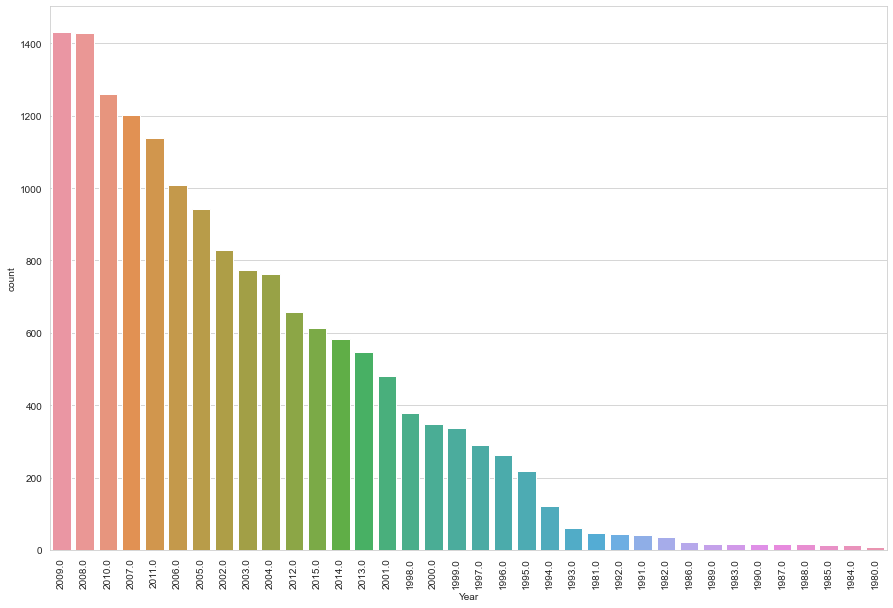

In [11]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order=data.groupby(by=["Year"])["Name"].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

`2009년`, `2008년`, `2010년`, `2007년`, `2011년` 순으로 게임 출시가 가장 많이 되었다.

## 3. Top 5 years games release by genre

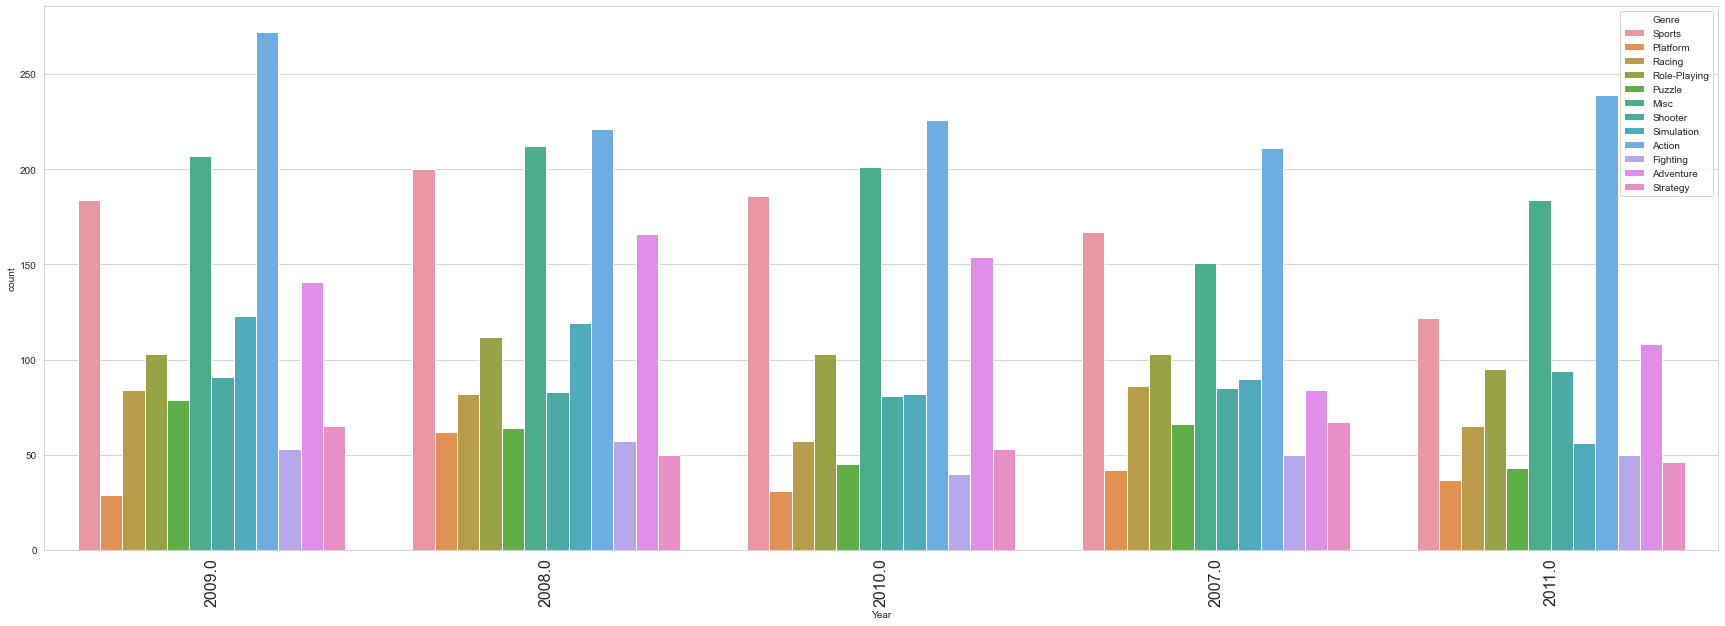

In [12]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue="Genre", order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)
plt.show()

`Action`이 항상 높다

## 4. Which year had the highest sales worldwide?

In [13]:
data_year = data.groupby(by=["Year"])["Global_Sales"].sum()
data_year = data_year.reset_index()

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04
31,2011.0,515.99
25,2005.0,459.94
24,2004.0,419.31
22,2002.0,395.52
33,2013.0,368.11


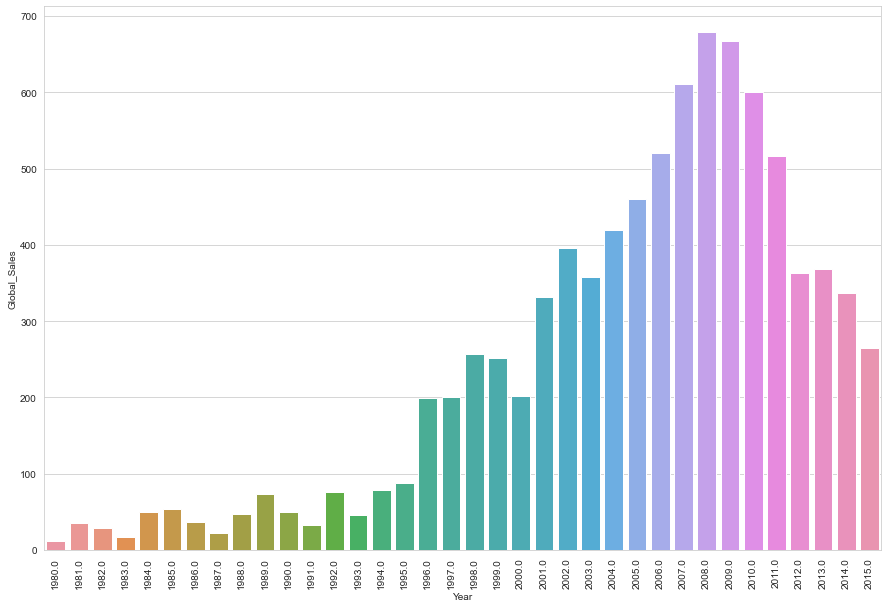

In [14]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)
plt.show()

`2008년`, `2009년`, `2007년`, `2010년`, `2006년` 순으로 전세계 판매량이 제일 많다 <br>
`2006년`은 게임 출시량 top5 안에는 들지 않았지만, 판매량 top5 안에 들었다.

## 5. Which genre game has been released the most in  a single year?

In [15]:
year_max_df = data.groupby(["Year", "Genre"]).size().reset_index(name="count")
year_max_idx = year_max_df.groupby(["Year"])["count"].transform(max) == year_max_df["count"]
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep="last").reset_index(drop=True)

,Year,Genre,count
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,Shooter,3


`transform()`은 그룹 단위로 요약 통계량을 집계하여 원래의 `DataFrame`에 통계량 column을 추가하도록 해준다.

In [16]:
genre = year_max_genre["Genre"].values
genre[0]

'Misc'

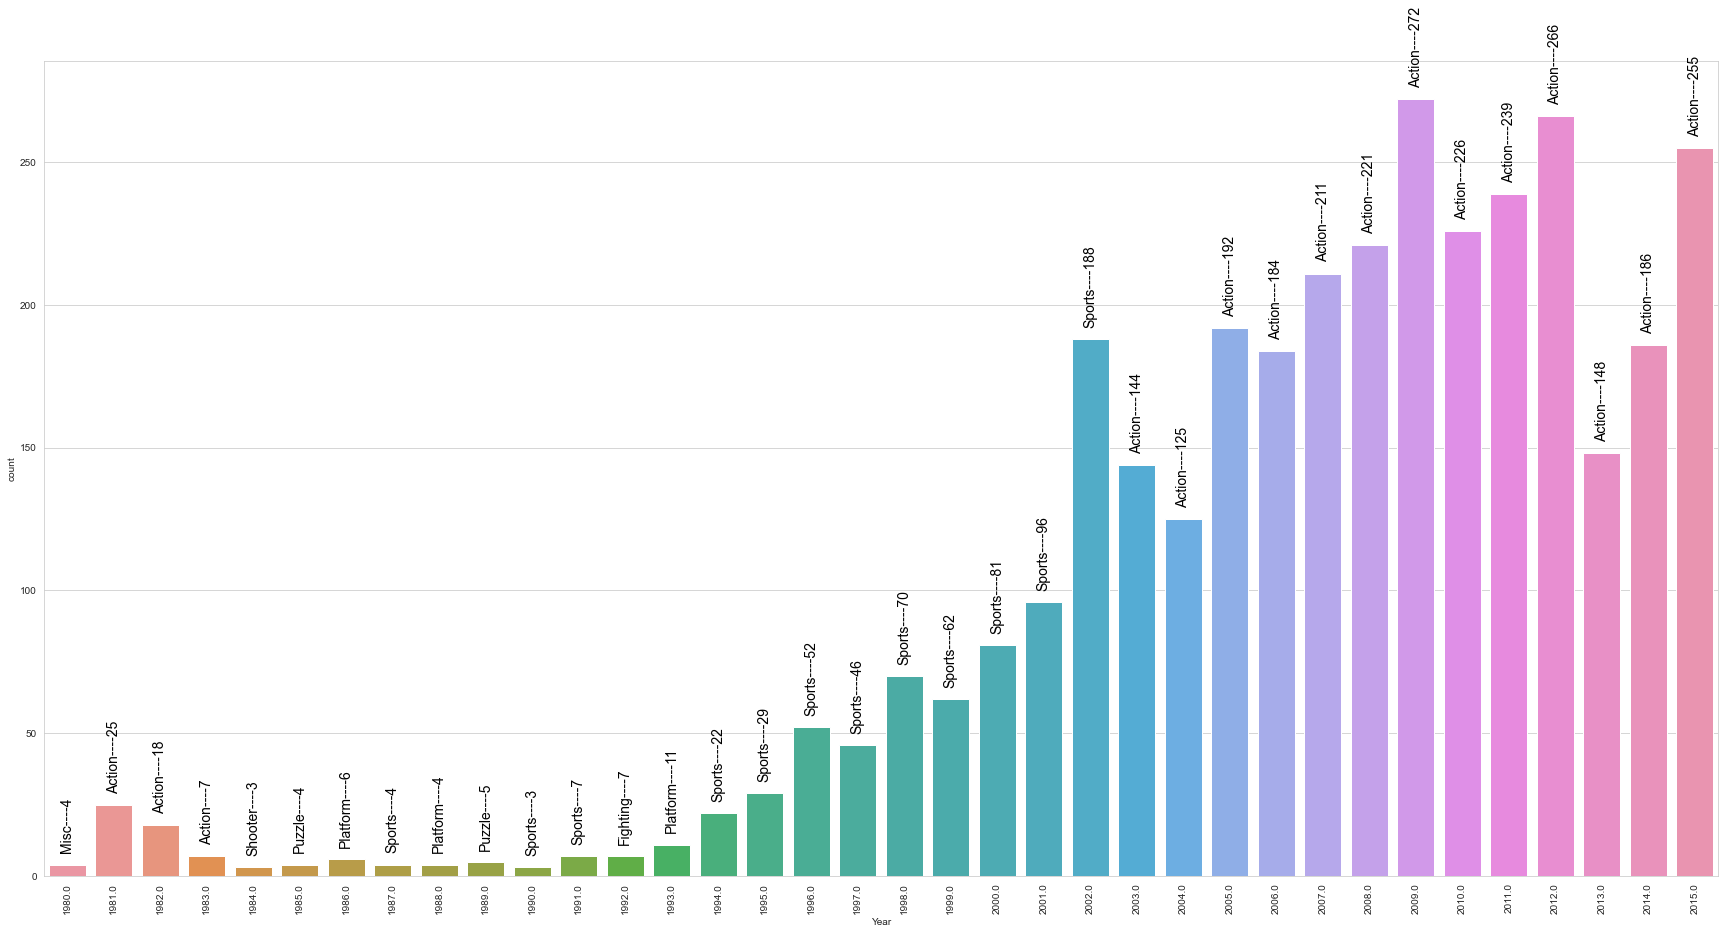

In [17]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x="Year", y="count", data=year_max_genre)
index = 0
for value in year_max_genre["count"].values:
    g.text(index, value+5, str(genre[index] + "----" + str(value)), color="#000", size=14, rotation=90, ha="center")
    index += 1
    
plt.xticks(rotation=90)
plt.show()

`2009년`에 `Action` 장르가 `272개`, `2012년`에 `Action` 장르가 `266개`로 한 해에 제일 많이 출시되었다.

## 6. Which genre game has sold the most in a single year?

In [20]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

,Year,Genre,Global_Sales
0,1980.0,Shooter,7.07
1,1981.0,Action,14.84
2,1982.0,Puzzle,10.03
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10


In [21]:
genre = year_sale_max["Genre"]

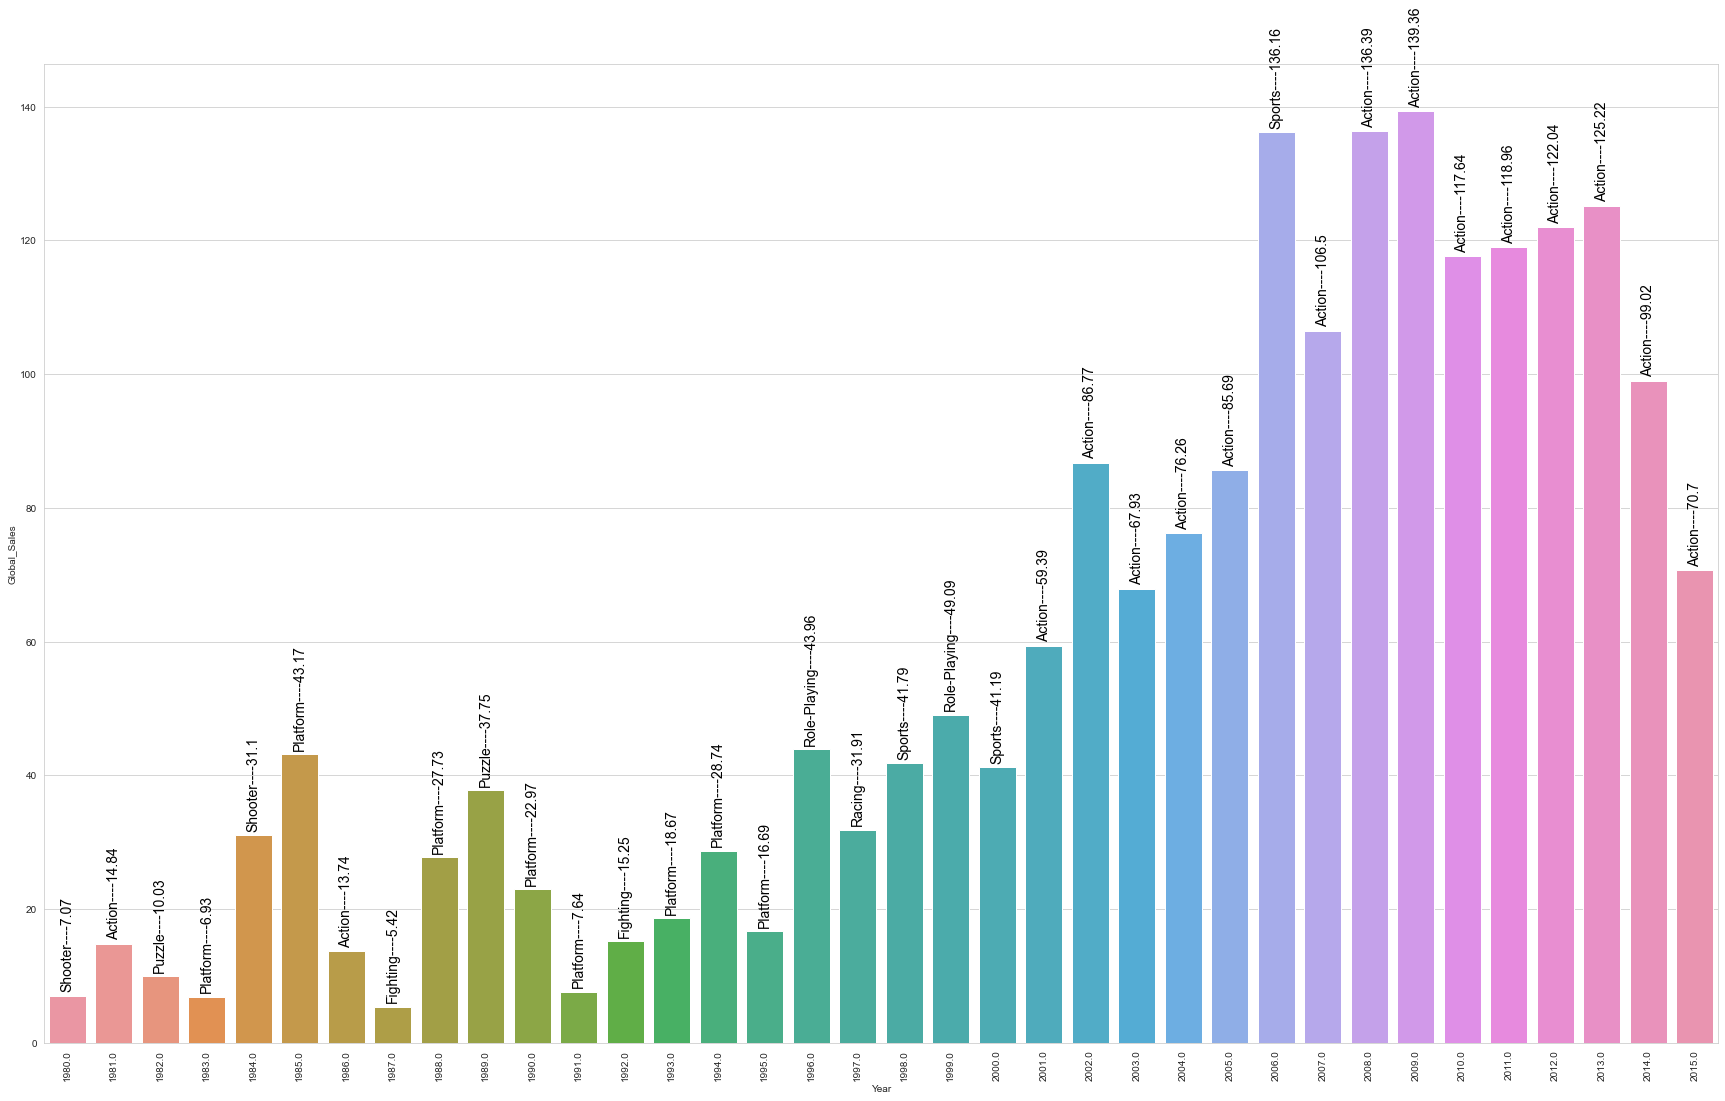

In [23]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x="Year", y="Global_Sales", data=year_sale_max)
index = 0
for value in year_sale_max["Global_Sales"]:
    g.text(index, value + 1, str(genre[index] + "----" + str(round(value, 2))), color="#000", size=14, rotation=90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

`2009년`에 `Action`이 `139.36 million`, `2008년`에 `Action`이 `136.39 miliion`으로 가장 많이 팔렸다.

## 7. Which genre game have the highest sale price globally?

In [24]:
data_genre = data.groupby(by=["Genre"])["Global_Sales"].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=["Global_Sales"], ascending=False)

,Genre,Global_Sales
0,Action,1731.26
10,Sports,1316.33
8,Shooter,1019.15
7,Role-Playing,920.57
4,Platform,829.30


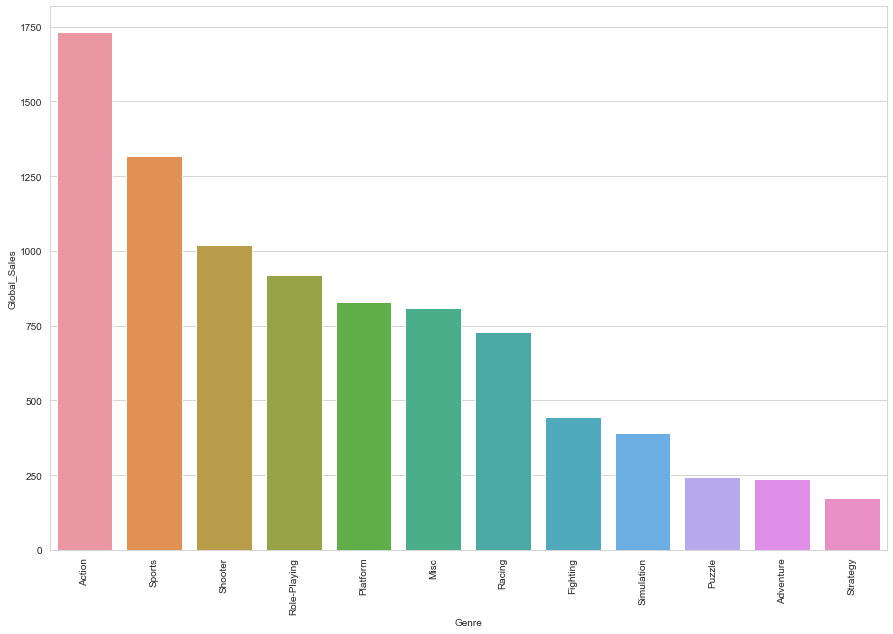

In [25]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)
plt.show()

`Action`과 `Sports`가 언제나 탑이다. `Shooter`가 count에서는 5위 밖이었는데 매출에서는 3위 안에 들었다는 점이 눈에 띈다.

## 8. Which platform have the highest sale price globally?

In [27]:
data_platform = data.groupby(by=["Platform"])["Global_Sales"].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=["Global_Sales"], ascending=False)

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.13
17,PS3,955.25
26,Wii,926.71
4,DS,822.20


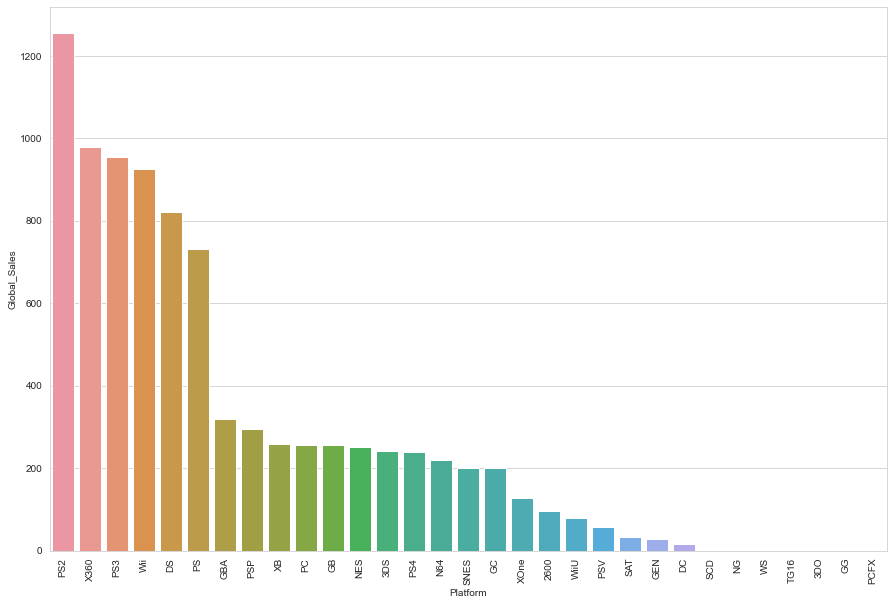

In [28]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)
plt.show()

`PS2`가 가장 높은 매출을 보인다.

## 9. Which individual game have the highest sale price globally?

In [30]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[["Name", "Year", "Genre", "Global_Sales"]]
top_game_sale = top_game_sale.sort_values(by=["Global_Sales"], ascending=False)

In [31]:
name = top_game_sale["Name"]
year = top_game_sale["Year"]
y = np.arange(0, 20)

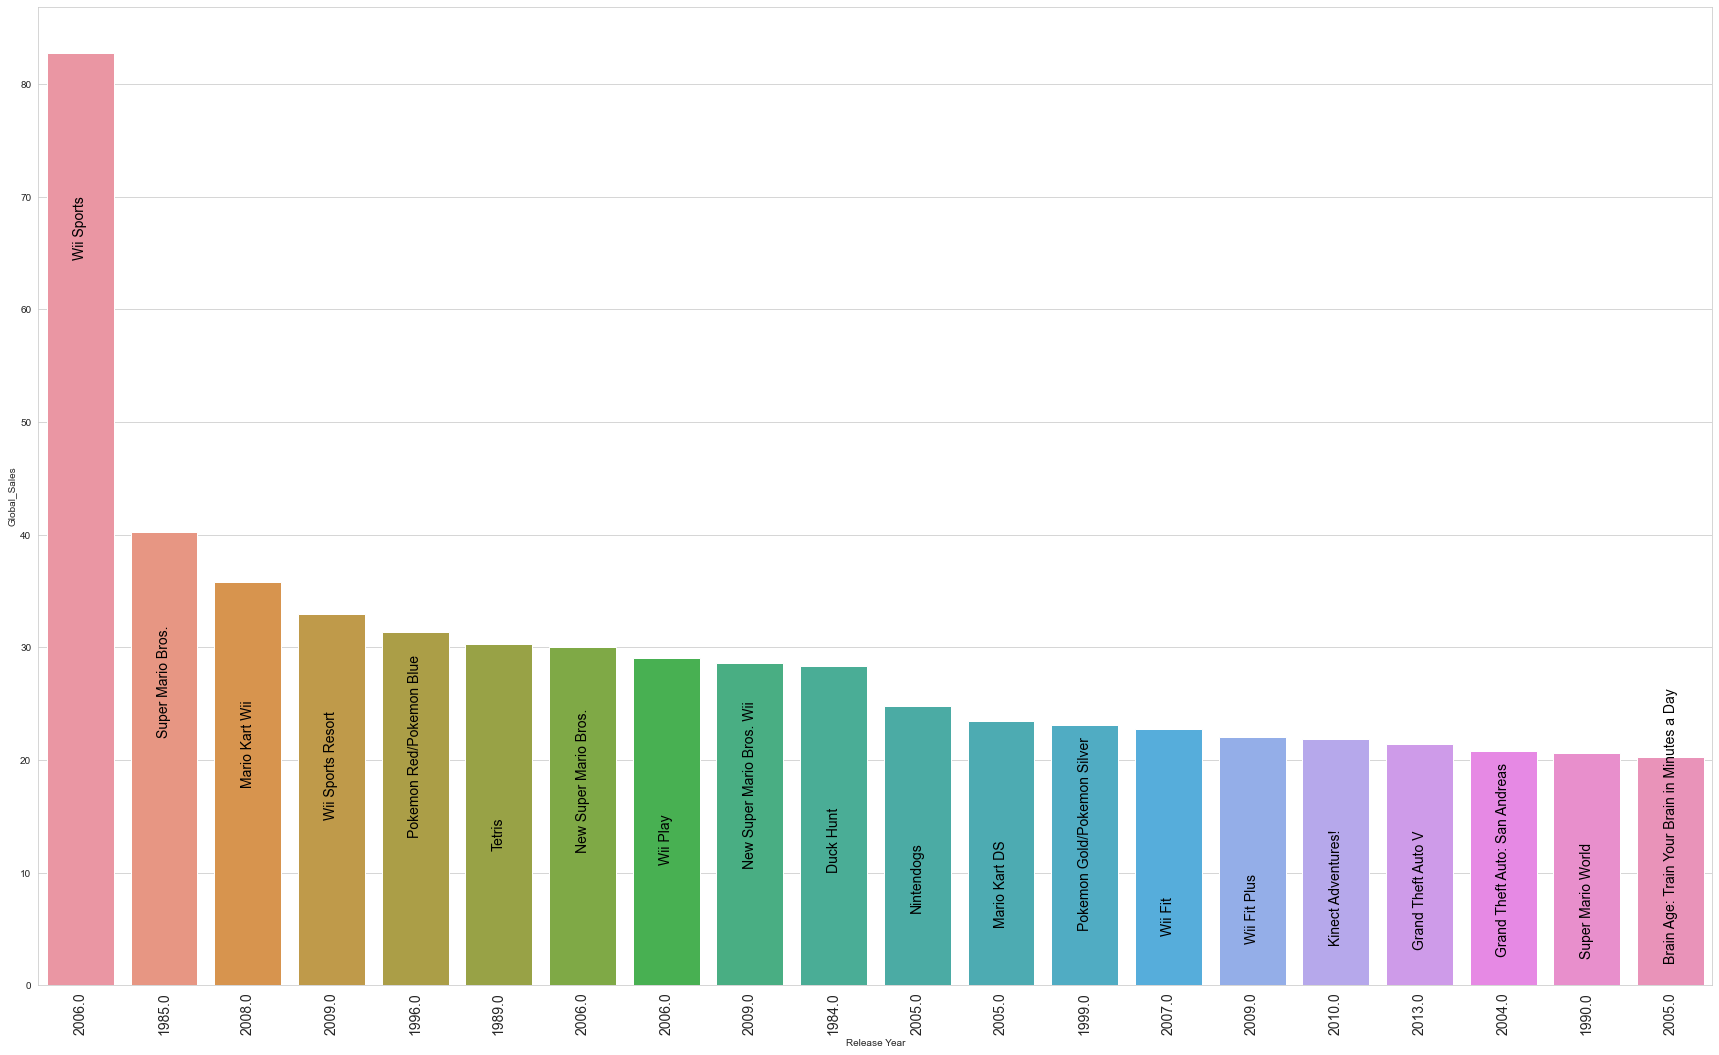

In [32]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x="Name", y="Global_Sales", data=top_game_sale)
index = 0
for value in top_game_sale["Global_Sales"]:
    g.text(index, value - 18, name[index], color="#000", size=14, rotation=90, ha="center")
    index += 1

plt.xticks(y, top_game_sale["Year"], fontsize=14, rotation=90)
plt.xlabel("Release Year")
plt.show()

`Wii Sports`가 가장 많이 팔렸다.

## 10. Sales comparison by genre

In [33]:
comp_genre = data[["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
comp_map = comp_genre.groupby(by=["Genre"]).sum()

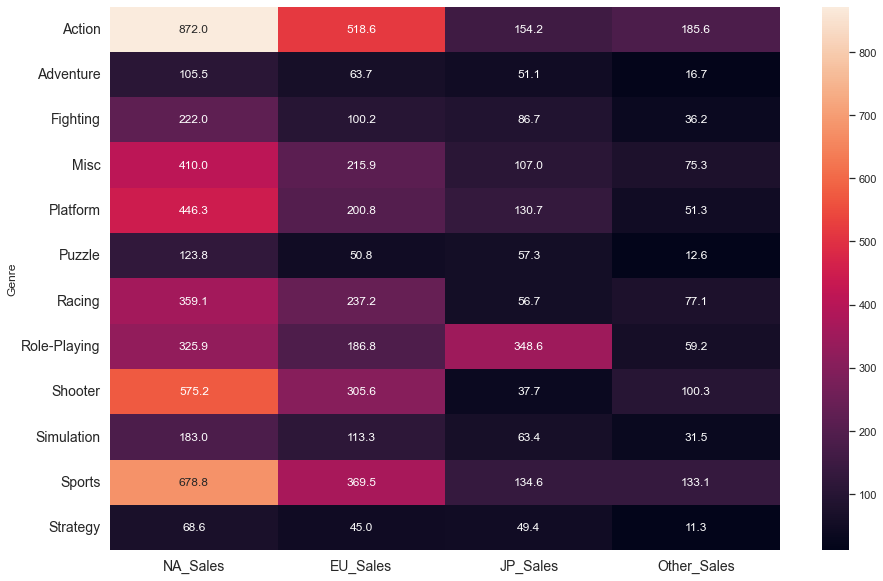

In [34]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt=".1f")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [36]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=["Genre"], value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
                    var_name="Sale_Area", value_name="Sale_Price")
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


`pd.melt`는 데이터를 재구조화할 수 있게 해주는 함수로, `id_vars`에 따른 `value_vars`를 쭉 나열해준다.<br>
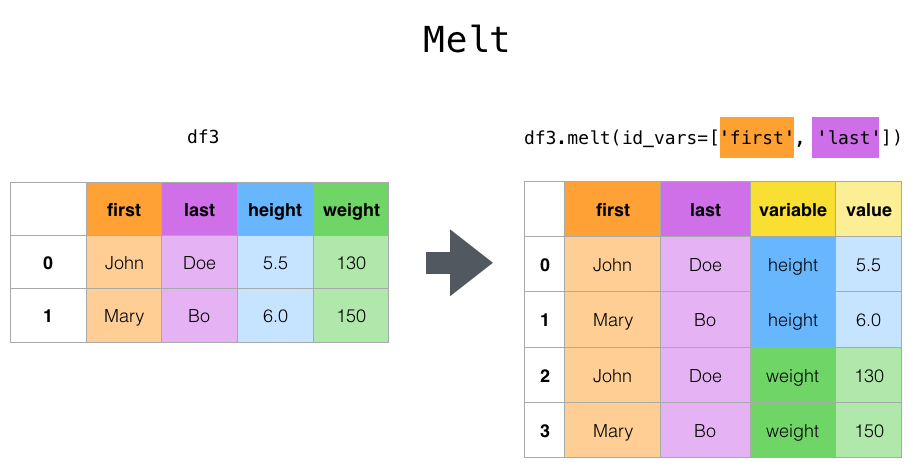

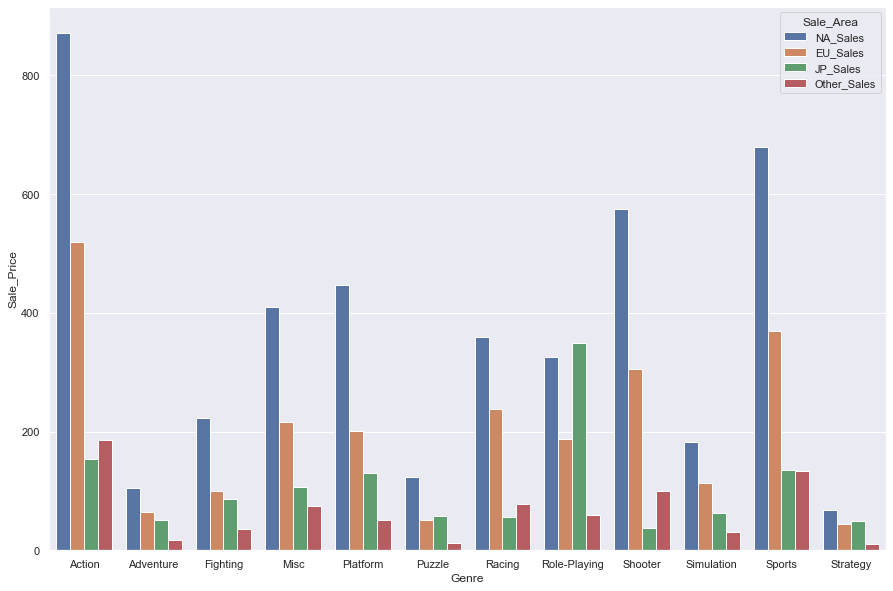

In [37]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Sale_Price", hue="Sale_Area", data=comp_table);

`Action`과 `Sports`와 `Shooter`가 다른 장르에 비해 판매량이 더 많다. 그리고 북아메리카(NA_Sales)가 모든 장르에서 판매량이 높은 편이다. 북아메리카 사람들이 비디오 게임을 제일 좋아하는 것으로 보인다!

## Sales comparison by platform

In [38]:
comp_platform = data[["Platform", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [39]:
comp_platform = comp_platform.groupby(by=["Platform"]).sum().reset_index()

In [40]:
comp_table = pd.melt(comp_platform, id_vars=["Platform"], value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
                    var_name="Sale_Area", value_name="Sale_Price")
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


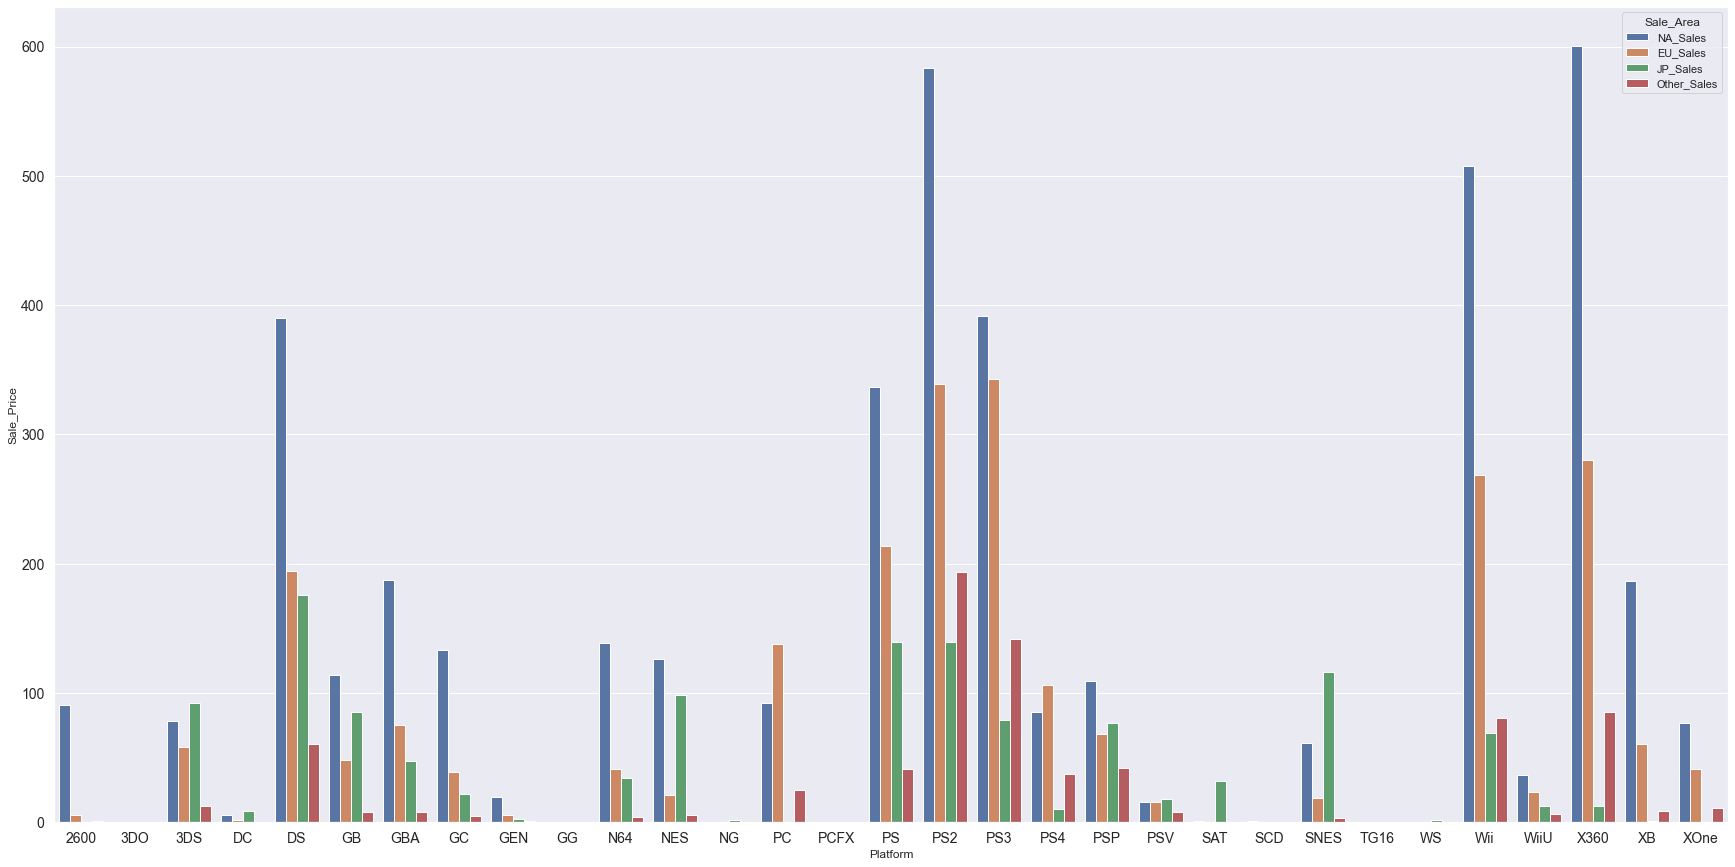

In [41]:
plt.figure(figsize=(30, 15))
sns.barplot(x="Platform", y="Sale_Price", hue="Sale_Area", data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`X360`, `Wii`, `PS`가 마켓 리더인 것이 명확하다. 그리고 북아메리카가 항상 탑이다.

## 12. Top 20 publisher

In [42]:
top_publisher = data.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

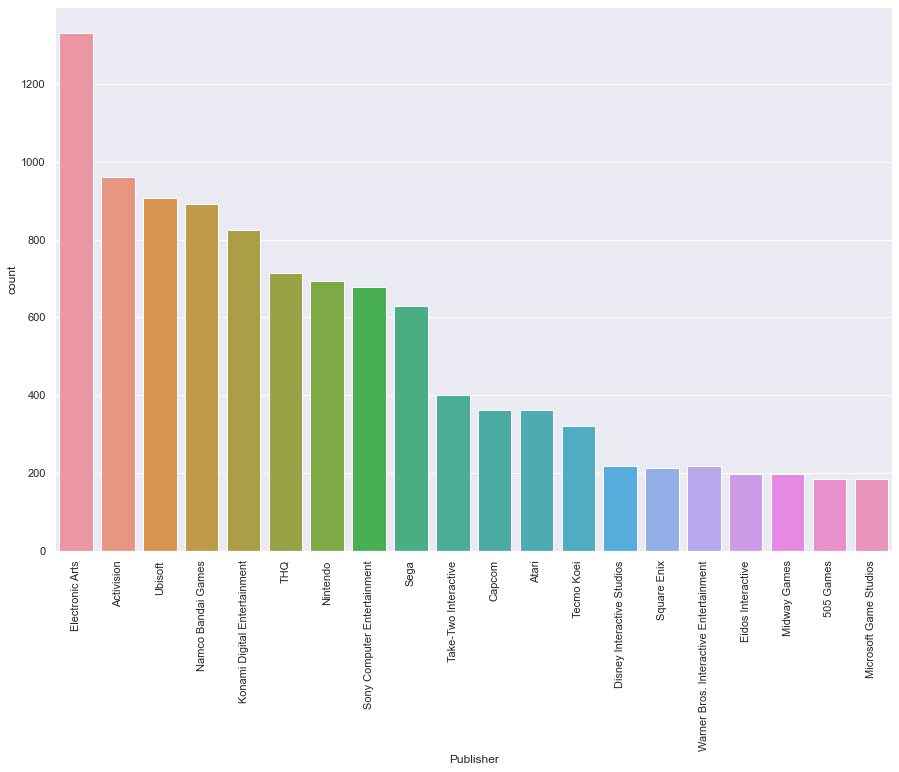

In [43]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, 
              order=data.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
plt.show()

`Electronic Arts(EA Sports)`가 1339로 제일 크다.

## 13. Top global sales by publisher

In [46]:
sale_pbl = data[["Publisher", "Global_Sales"]]
sale_pbl = sale_pbl.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

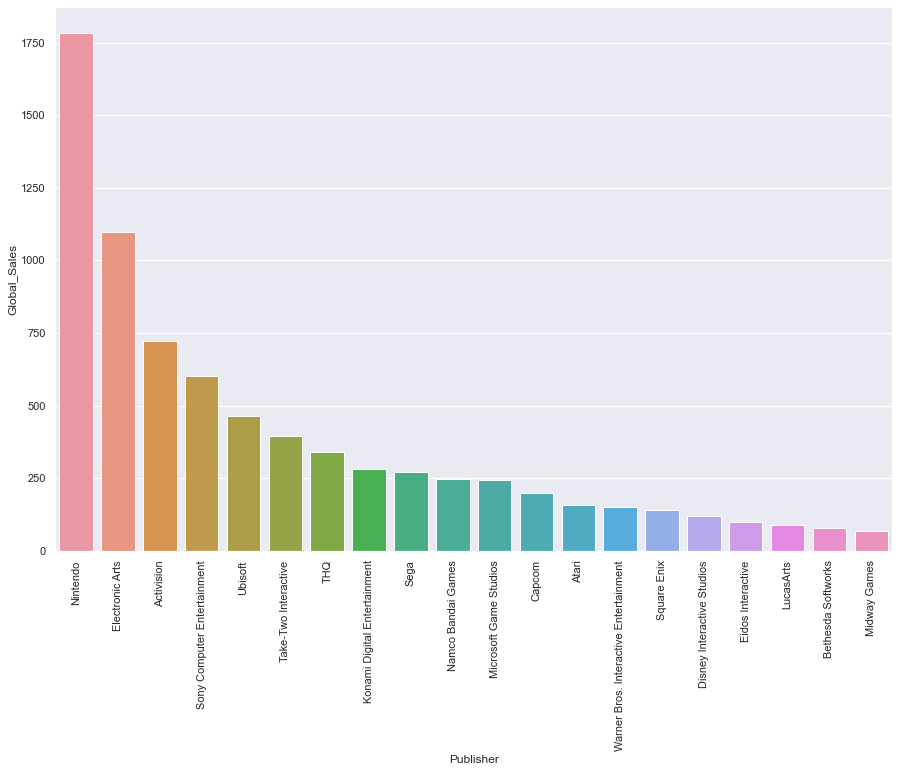

In [47]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Publisher", y="Global_Sales", data=sale_pbl)
plt.xticks(rotation=90)
plt.show()

`Nintendo`가 제일 많이 벌었다. top 5 퍼블리셔가 아님에도 제일 많이 벌었다.

## 14. Publisher comparison

In [48]:
comp_publisher = data[["Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [49]:
comp_publisher = comp_publisher.groupby(by=["Publisher"]).sum().reset_index().sort_values(by=["Global_Sales"], ascending=False)
comp_publisher = comp_publisher.head(20)

In [50]:
comp_publisher = pd.melt(comp_publisher, id_vars=["Publisher"], 
                         value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], var_name="Sale_Area", value_name="Sale_Price")
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,9.87


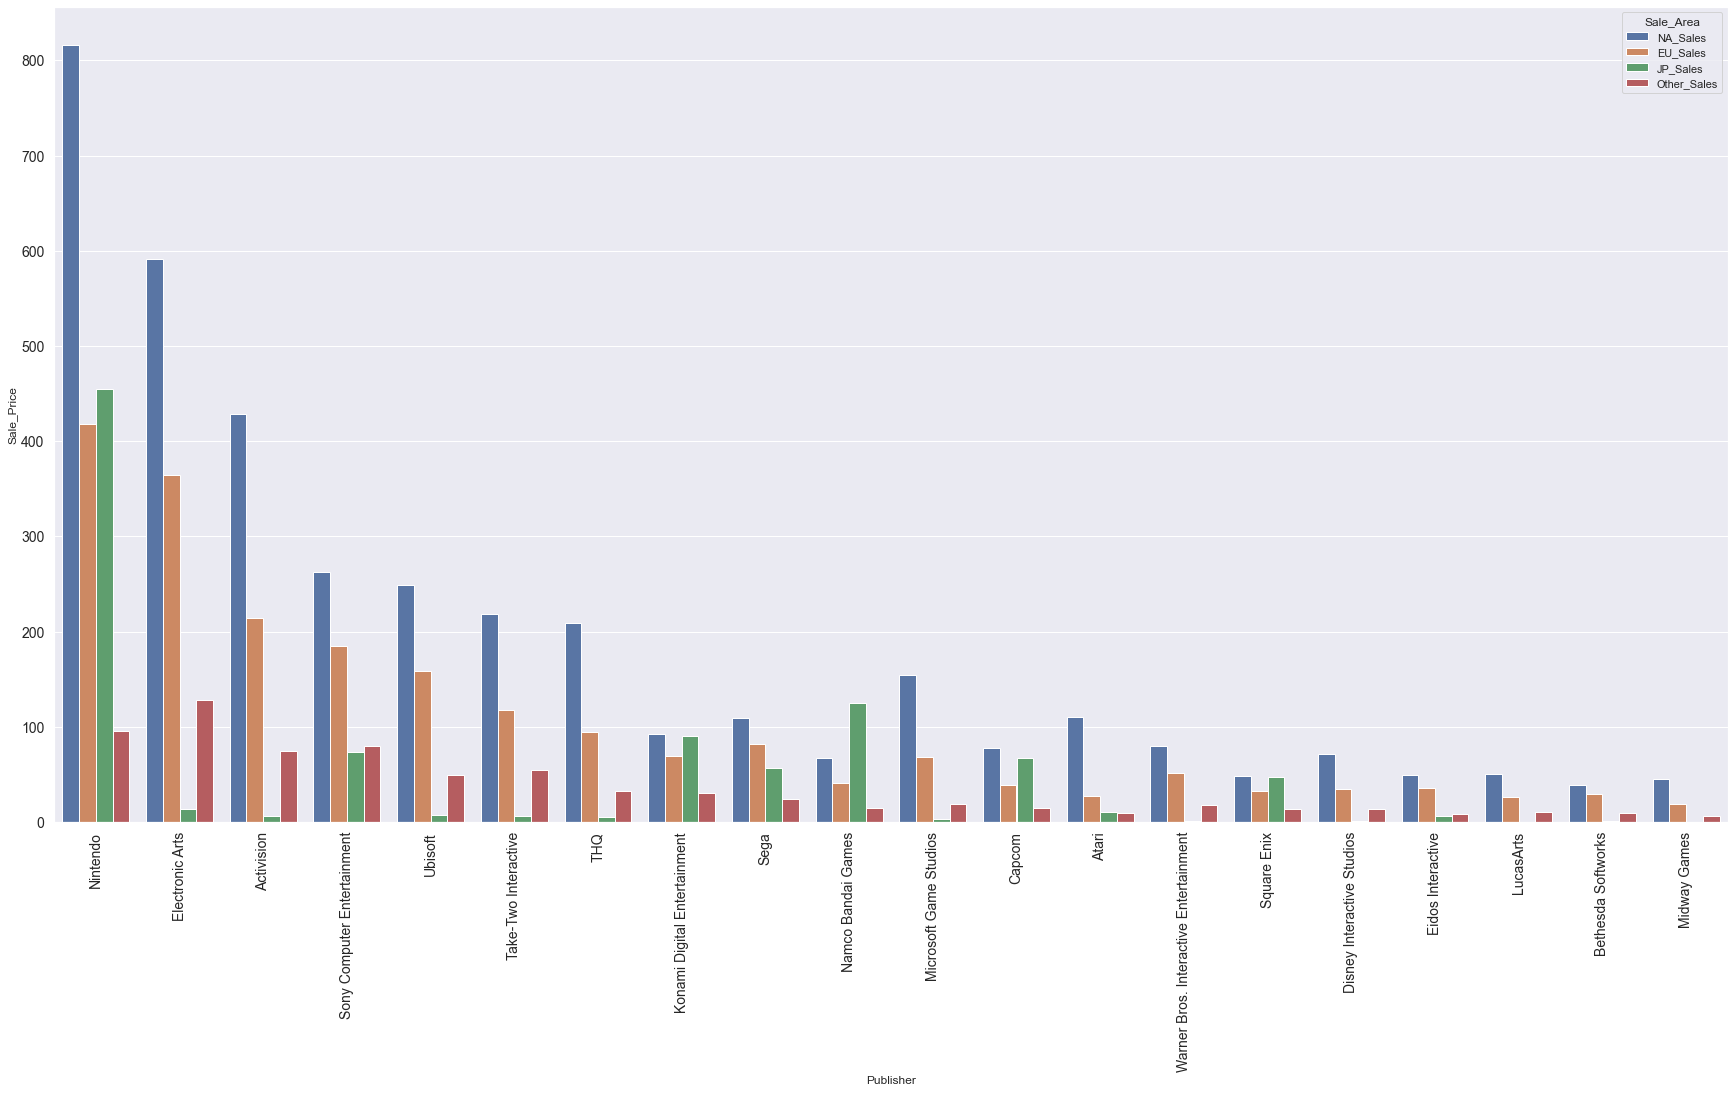

In [51]:
plt.figure(figsize=(30, 15))
sns.barplot(x="Publisher", y="Sale_Price", hue="Sale_Area", data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

## 15. Top publisher by count each year

In [52]:
top_publisher = data[["Year", "Publisher"]]
top_publisher_df = top_publisher.groupby(by=["Year", "Publisher"]).size().reset_index(name="Count")
top_publisher_idx = top_publisher_df.groupby(by=["Year"])["Count"].transform(max) == top_publisher_df["Count"]
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep="last").reset_index(drop=True)

In [53]:
publisher = top_publisher_count["Publisher"]

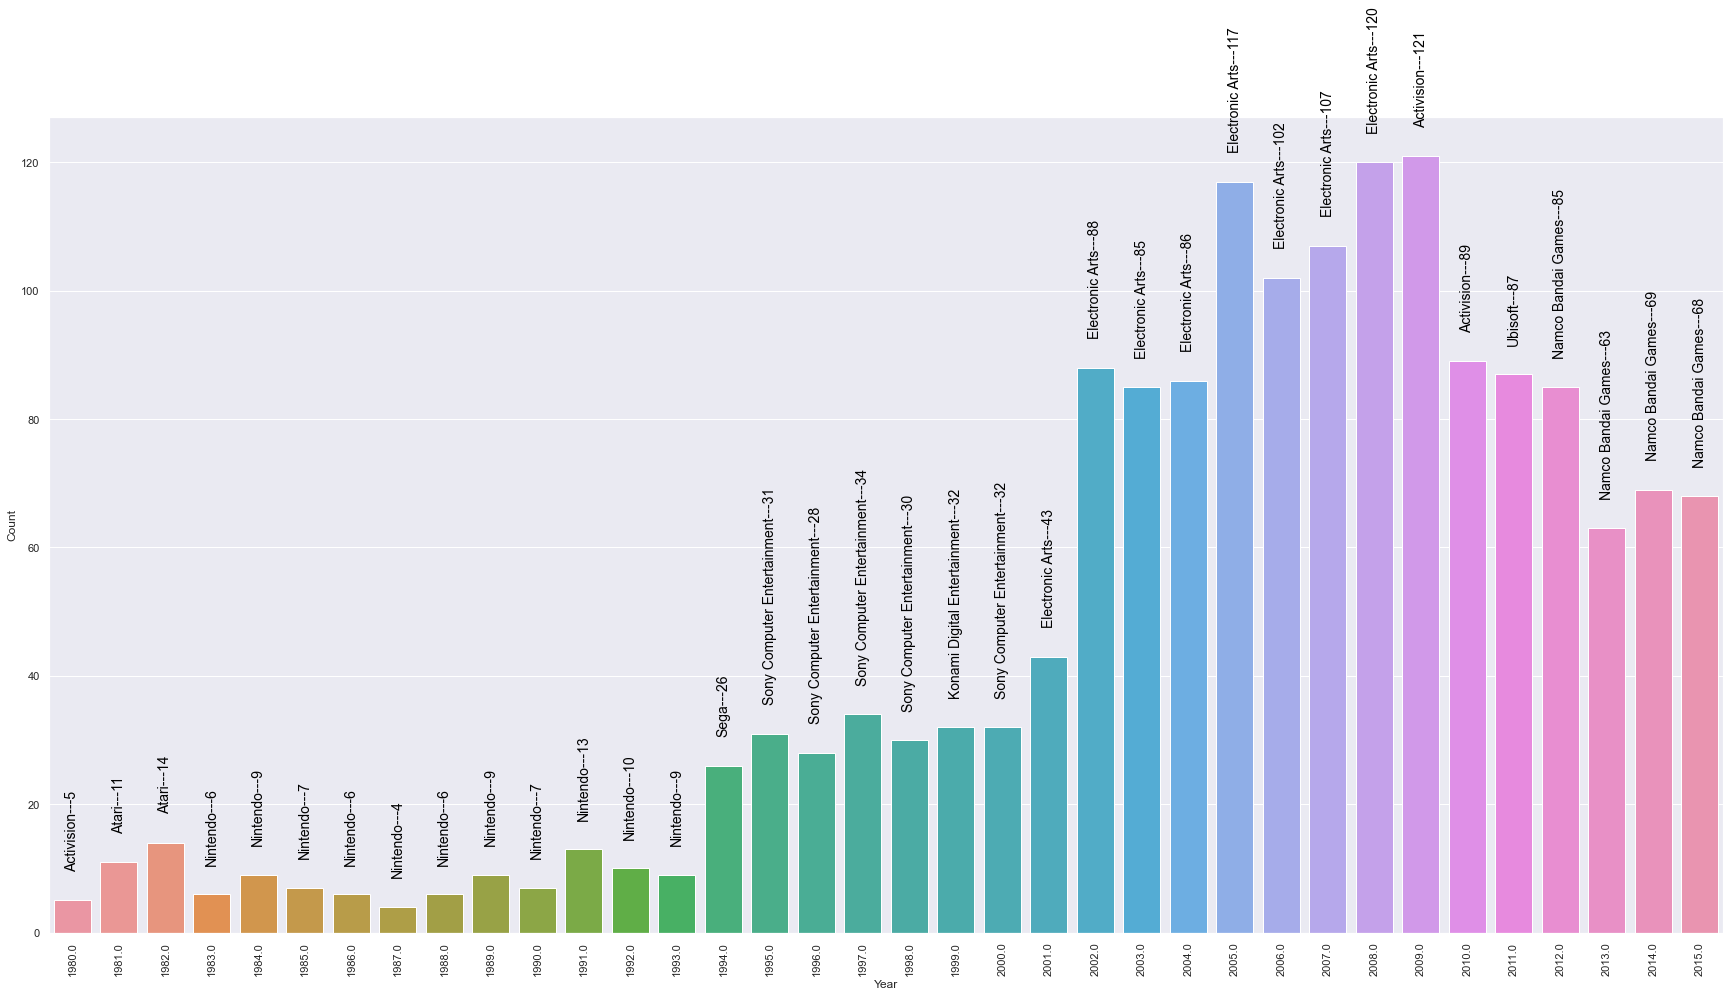

In [54]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x="Year", y="Count", data=top_publisher_count)
index = 0
for value in top_publisher_count["Count"].values:
    g.text(index, value + 5, str(publisher[index] + "---" + str(value)), color="#000", size=14,
          rotation=90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

## 16. Total revenue by region

In [55]:
top_sale_reg = data[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


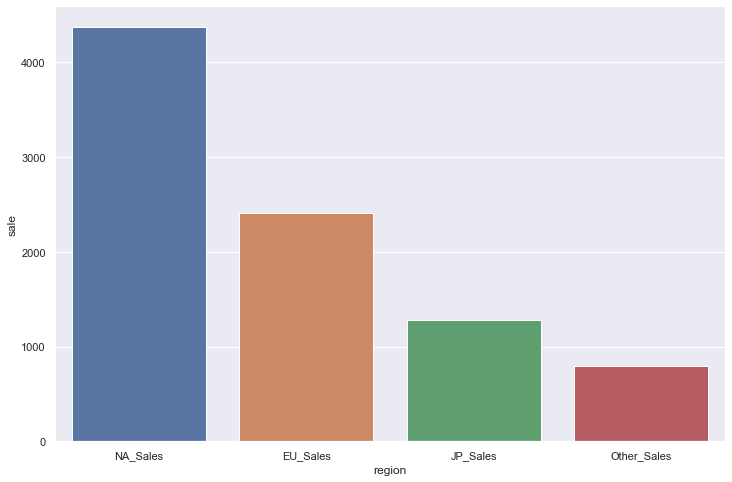

In [56]:
plt.figure(figsize=(12, 8))
sns.barplot(x="region", y="sale", data=top_sale_reg);

In [57]:
labels = top_sale_reg["region"]
sizes = top_sale_reg["sale"]

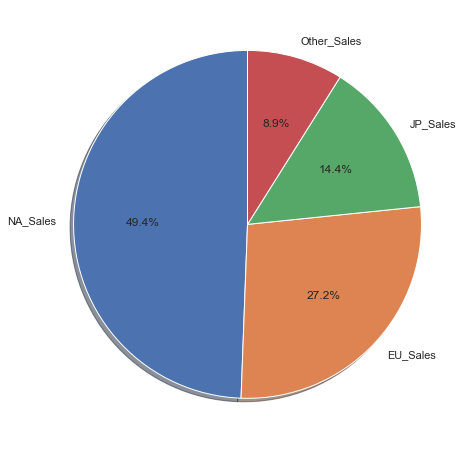

In [58]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90);

북아메리카가 거의 50% 세일을 차지하고 있다.

## 17. Sales histogram

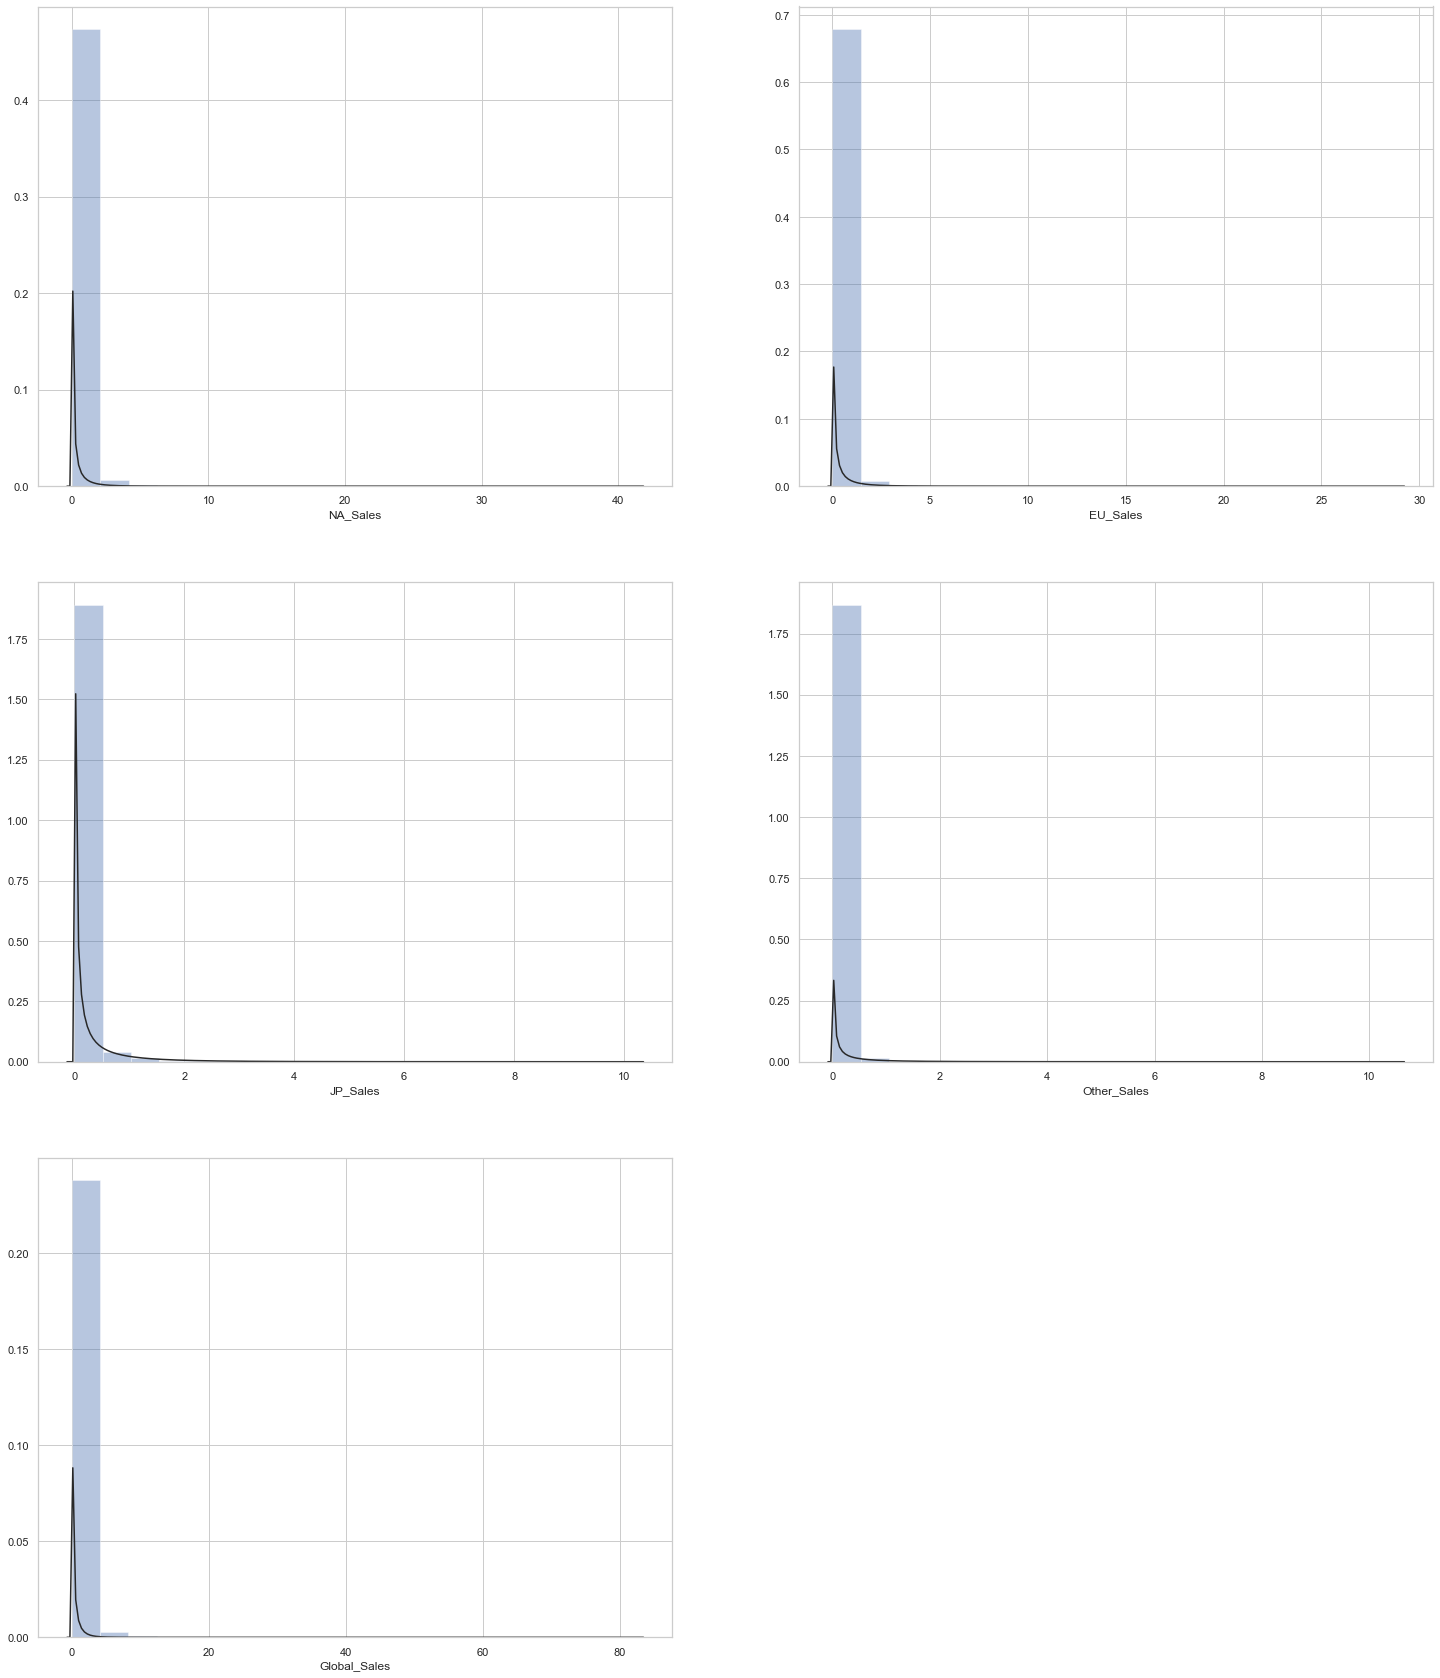

In [65]:
plt.figure(figsize=(25, 30))
sales_columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
for i, column in enumerate(sales_columns):
    plt.subplot(3, 2, i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

데이터가 치우쳐 있으므로 로그 변환을 할 필요가 있다.

### Distribution after log transformation

In [66]:
data_hist_log = data.copy()

In [67]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

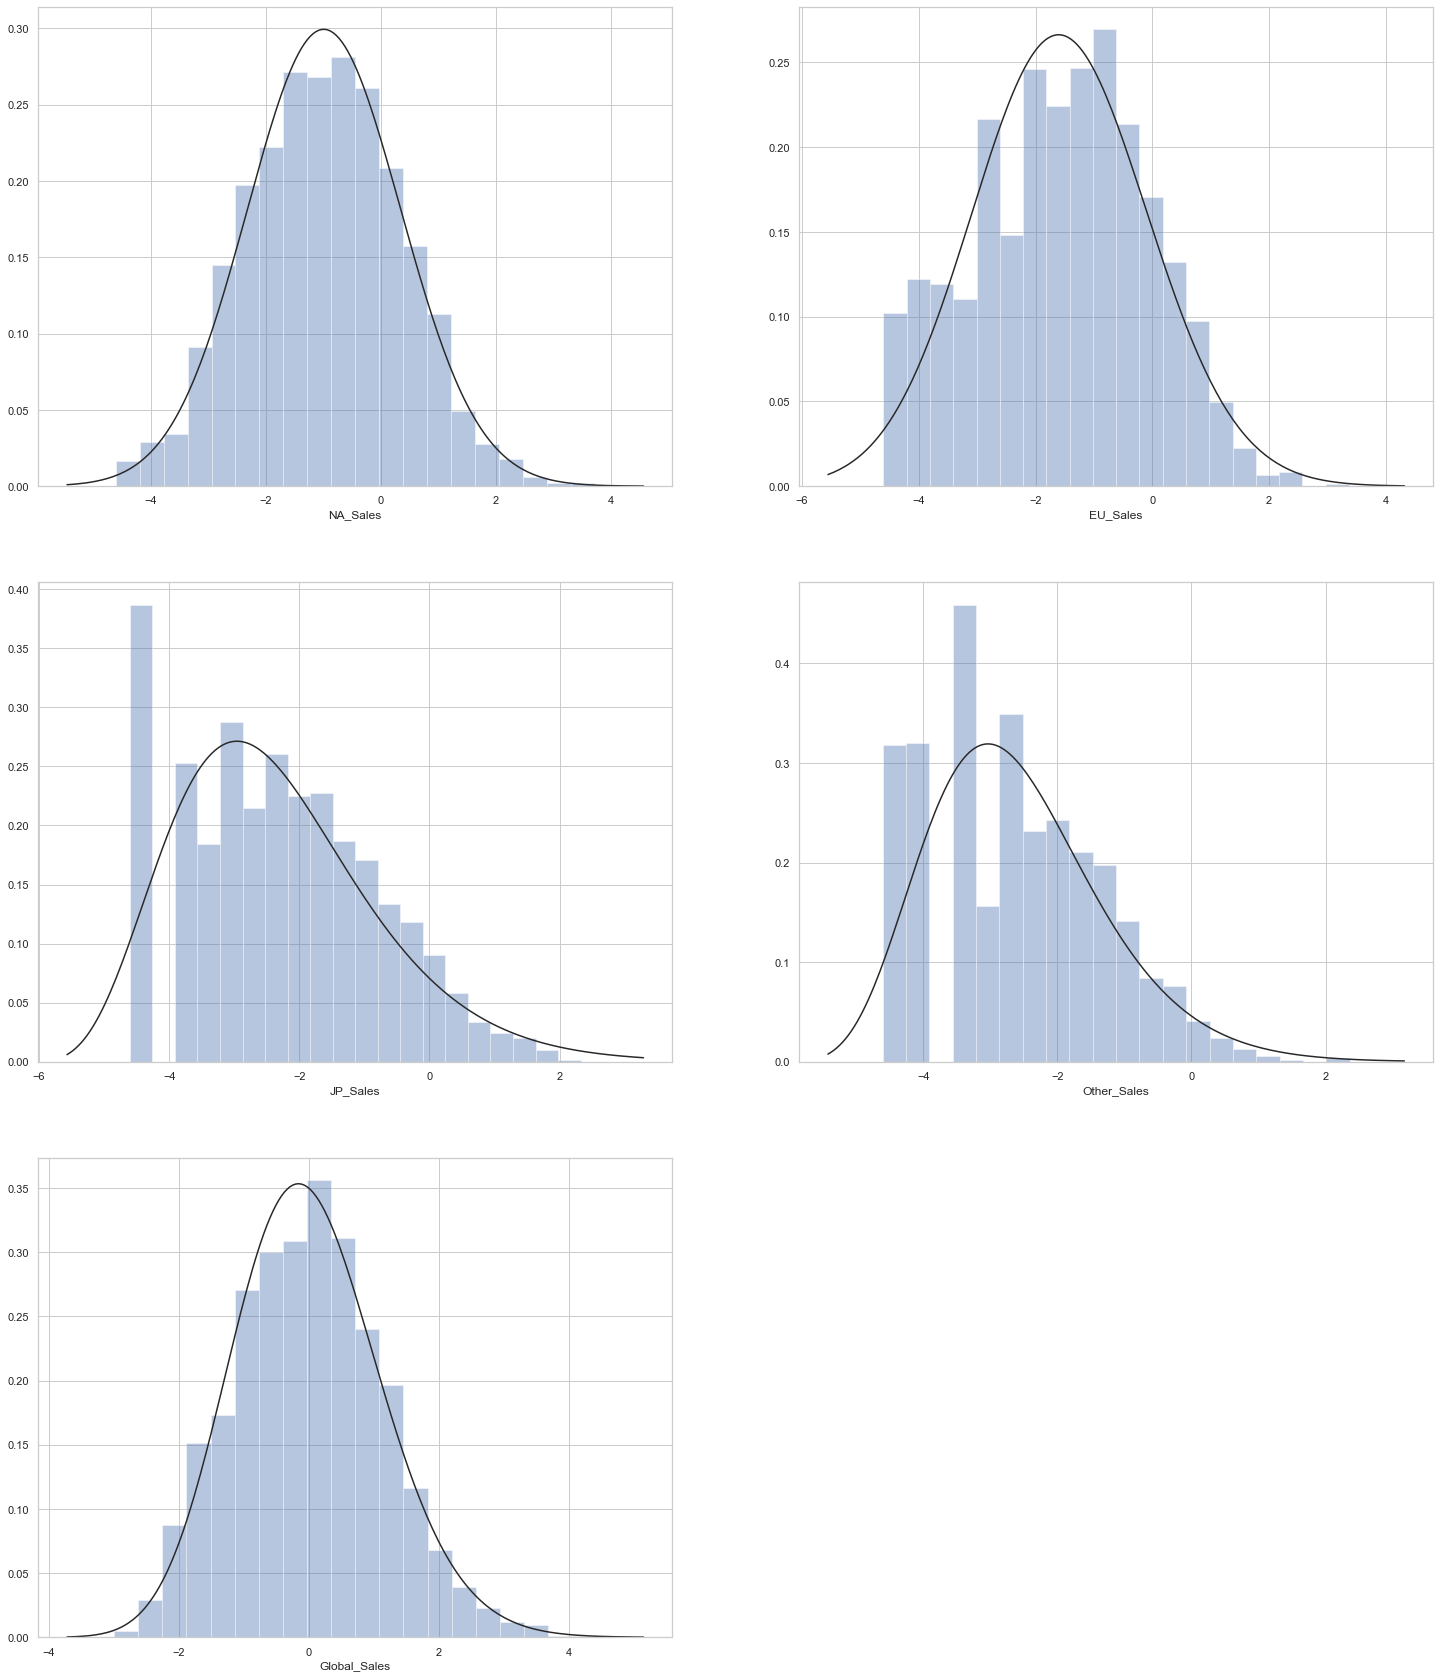

In [69]:
plt.figure(figsize=(25, 30))
sales_columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
for i, column in enumerate(sales_columns):
    plt.subplot(3, 2, i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

skewness가 개선된 것을 알 수 있다.

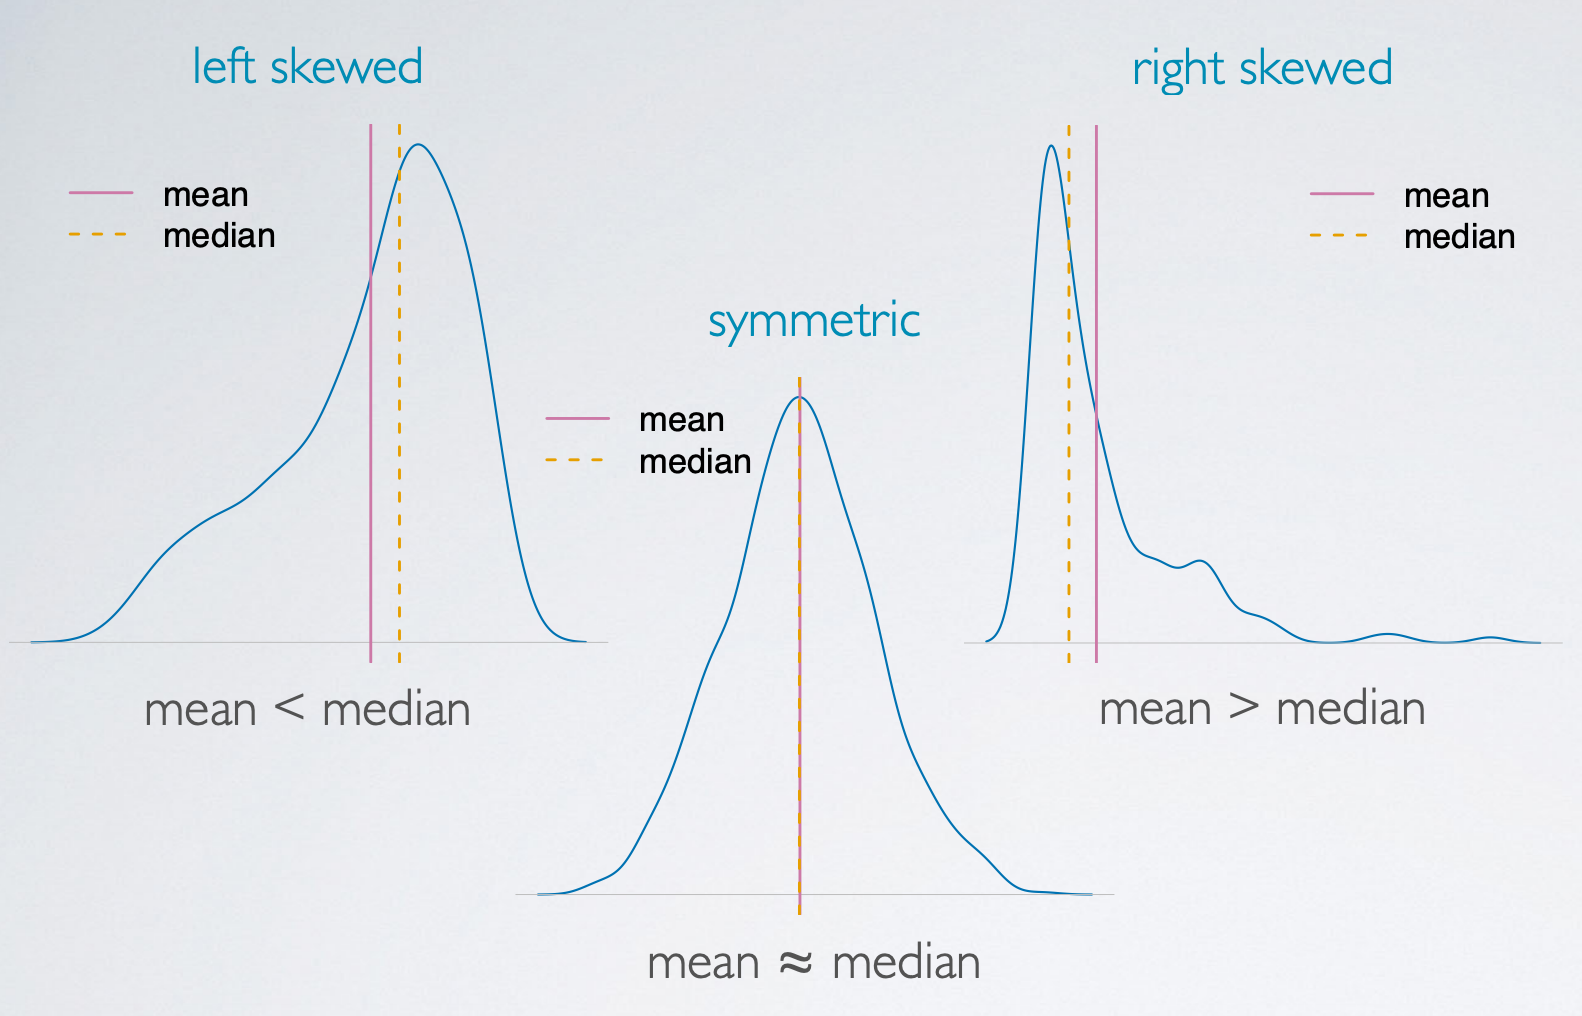

## Relations of columns

### heatmap
히트맵은 상관관계를 파악하는 데 좋다.

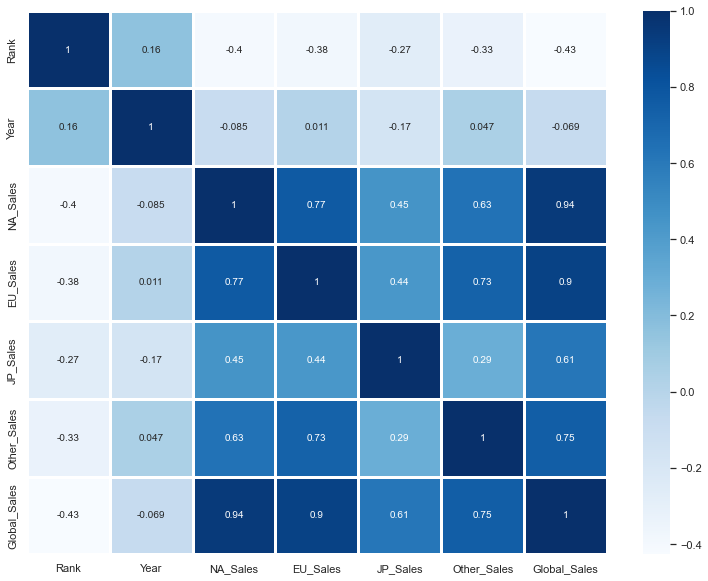

In [71]:
plt.figure(figsize=(13, 10))
sns.heatmap(data.corr(), cmap="Blues", annot=True, linewidth=3);

`NA_Sales`와 `EU_Sales`가 `Global_Sales`에 영향을 많이 준다. 그리고 `NA_Sales`와 `EU_Sales`가 높은 상관관계가 있다.

### Pair plot

In [72]:
data_pair = data.loc[:, ["Year", "Platform", "Genre", "NA_Sales", "EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


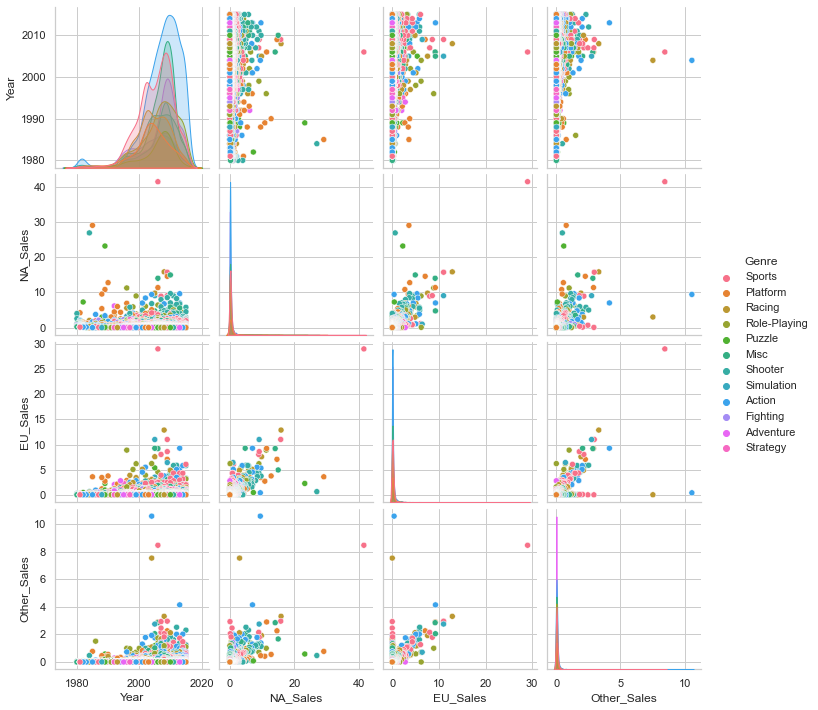

In [74]:
sns.pairplot(data_pair, hue="Genre");

## log work

In [75]:
data_pair_log = data_pair.copy()

In [76]:
sale_columns = ["NA_Sales", "EU_Sales", "Other_Sales"]

In [77]:
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

In [78]:
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
14071,1998.0,PC,Role-Playing,0.01,0.02,0.01
14183,2014.0,PS3,Racing,0.02,0.01,0.01
14185,2011.0,PC,Puzzle,0.01,0.02,0.01
14267,2007.0,PC,Puzzle,0.01,0.02,0.01


In [79]:
data_pair_log["NA_Sales"] = np.log(data_pair_log["NA_Sales"])
data_pair_log["EU_Sales"] = np.log(data_pair_log["EU_Sales"])
data_pair_log["Other_Sales"] = np.log(data_pair_log["Other_Sales"])

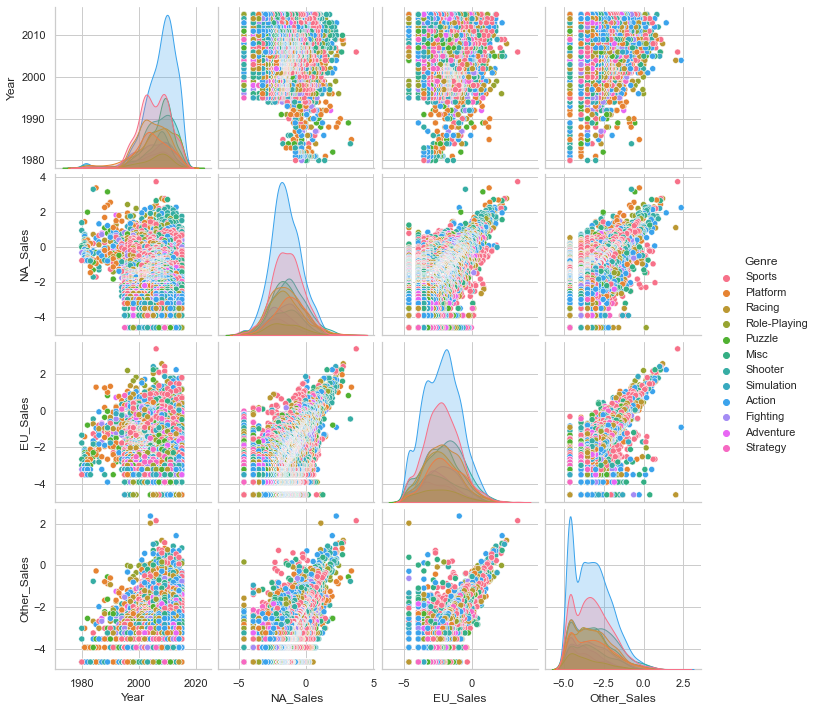

In [80]:
sns.pairplot(data_pair_log, hue="Genre", palette="husl");